# Using the GCF annotation
## Similar to hg38 (here using mRNA.peak sequence )
## Going to do both nucleotide frequency and the motifs in one notebook

In [1]:
## Parameters specific to where your folders are and your data
parameter_file = '../parameters/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
supplemental = doc["supplemental"]
sys.path.append(doc['pipeline_path'])

import time
import os
from os.path import join, basename
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *
import helper
import create_output
print('Number of tissues: ',len(tissues))

os.chdir(doc["results"])

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  import sys


Number of tissues:  13


In [14]:
import motif_analysis

In [2]:
homer_path =  "/data2/resources/software/homer/v4.11_10242019/bin/"
os.environ['PATH'] = f"{homer_path}:{os.environ['PATH']}"
!which homer

/data2/resources/software/homer/v4.11_10242019/bin//homer


## Input

In [3]:
ref_fa = doc["ref_fa"]
anno_gff = doc["annotation"]
mRNA_peak_file = "genome/picr/gcf/mRNA.peak"
tss_annotation = 'genome/picr/gcf/start_site_mRNA.tsv'
seq_f = "genome/picr/gcf/mRNA_150.tss.fa"
peak_f = "genome/picr/gcf/mRNA_150.tss.bed"

## Outdirs

In [4]:
nucleotide_out = "gcf_nucleotide"
motif_out = "gcf_motif_from_meme"

if not os.path.exists(nucleotide_out):
    os.mkdir(nucleotide_out)
    
if not os.path.exists(motif_out):
    os.mkdir(motif_out)

# Nucleotide Sequences of RefSeq TSS

annotatePeaks.pl genome/picr/gcf/mRNA.peak /data/isshamie/genome/hamster/ncbi_anno_103/GCF_003668045.1_CriGri-PICR/GCF_003668045.1_CriGri-PICR_genomic.fna -size 200 -hist 1 -di > gcf_nucleotide/gcf_nucfreq_nucl


No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


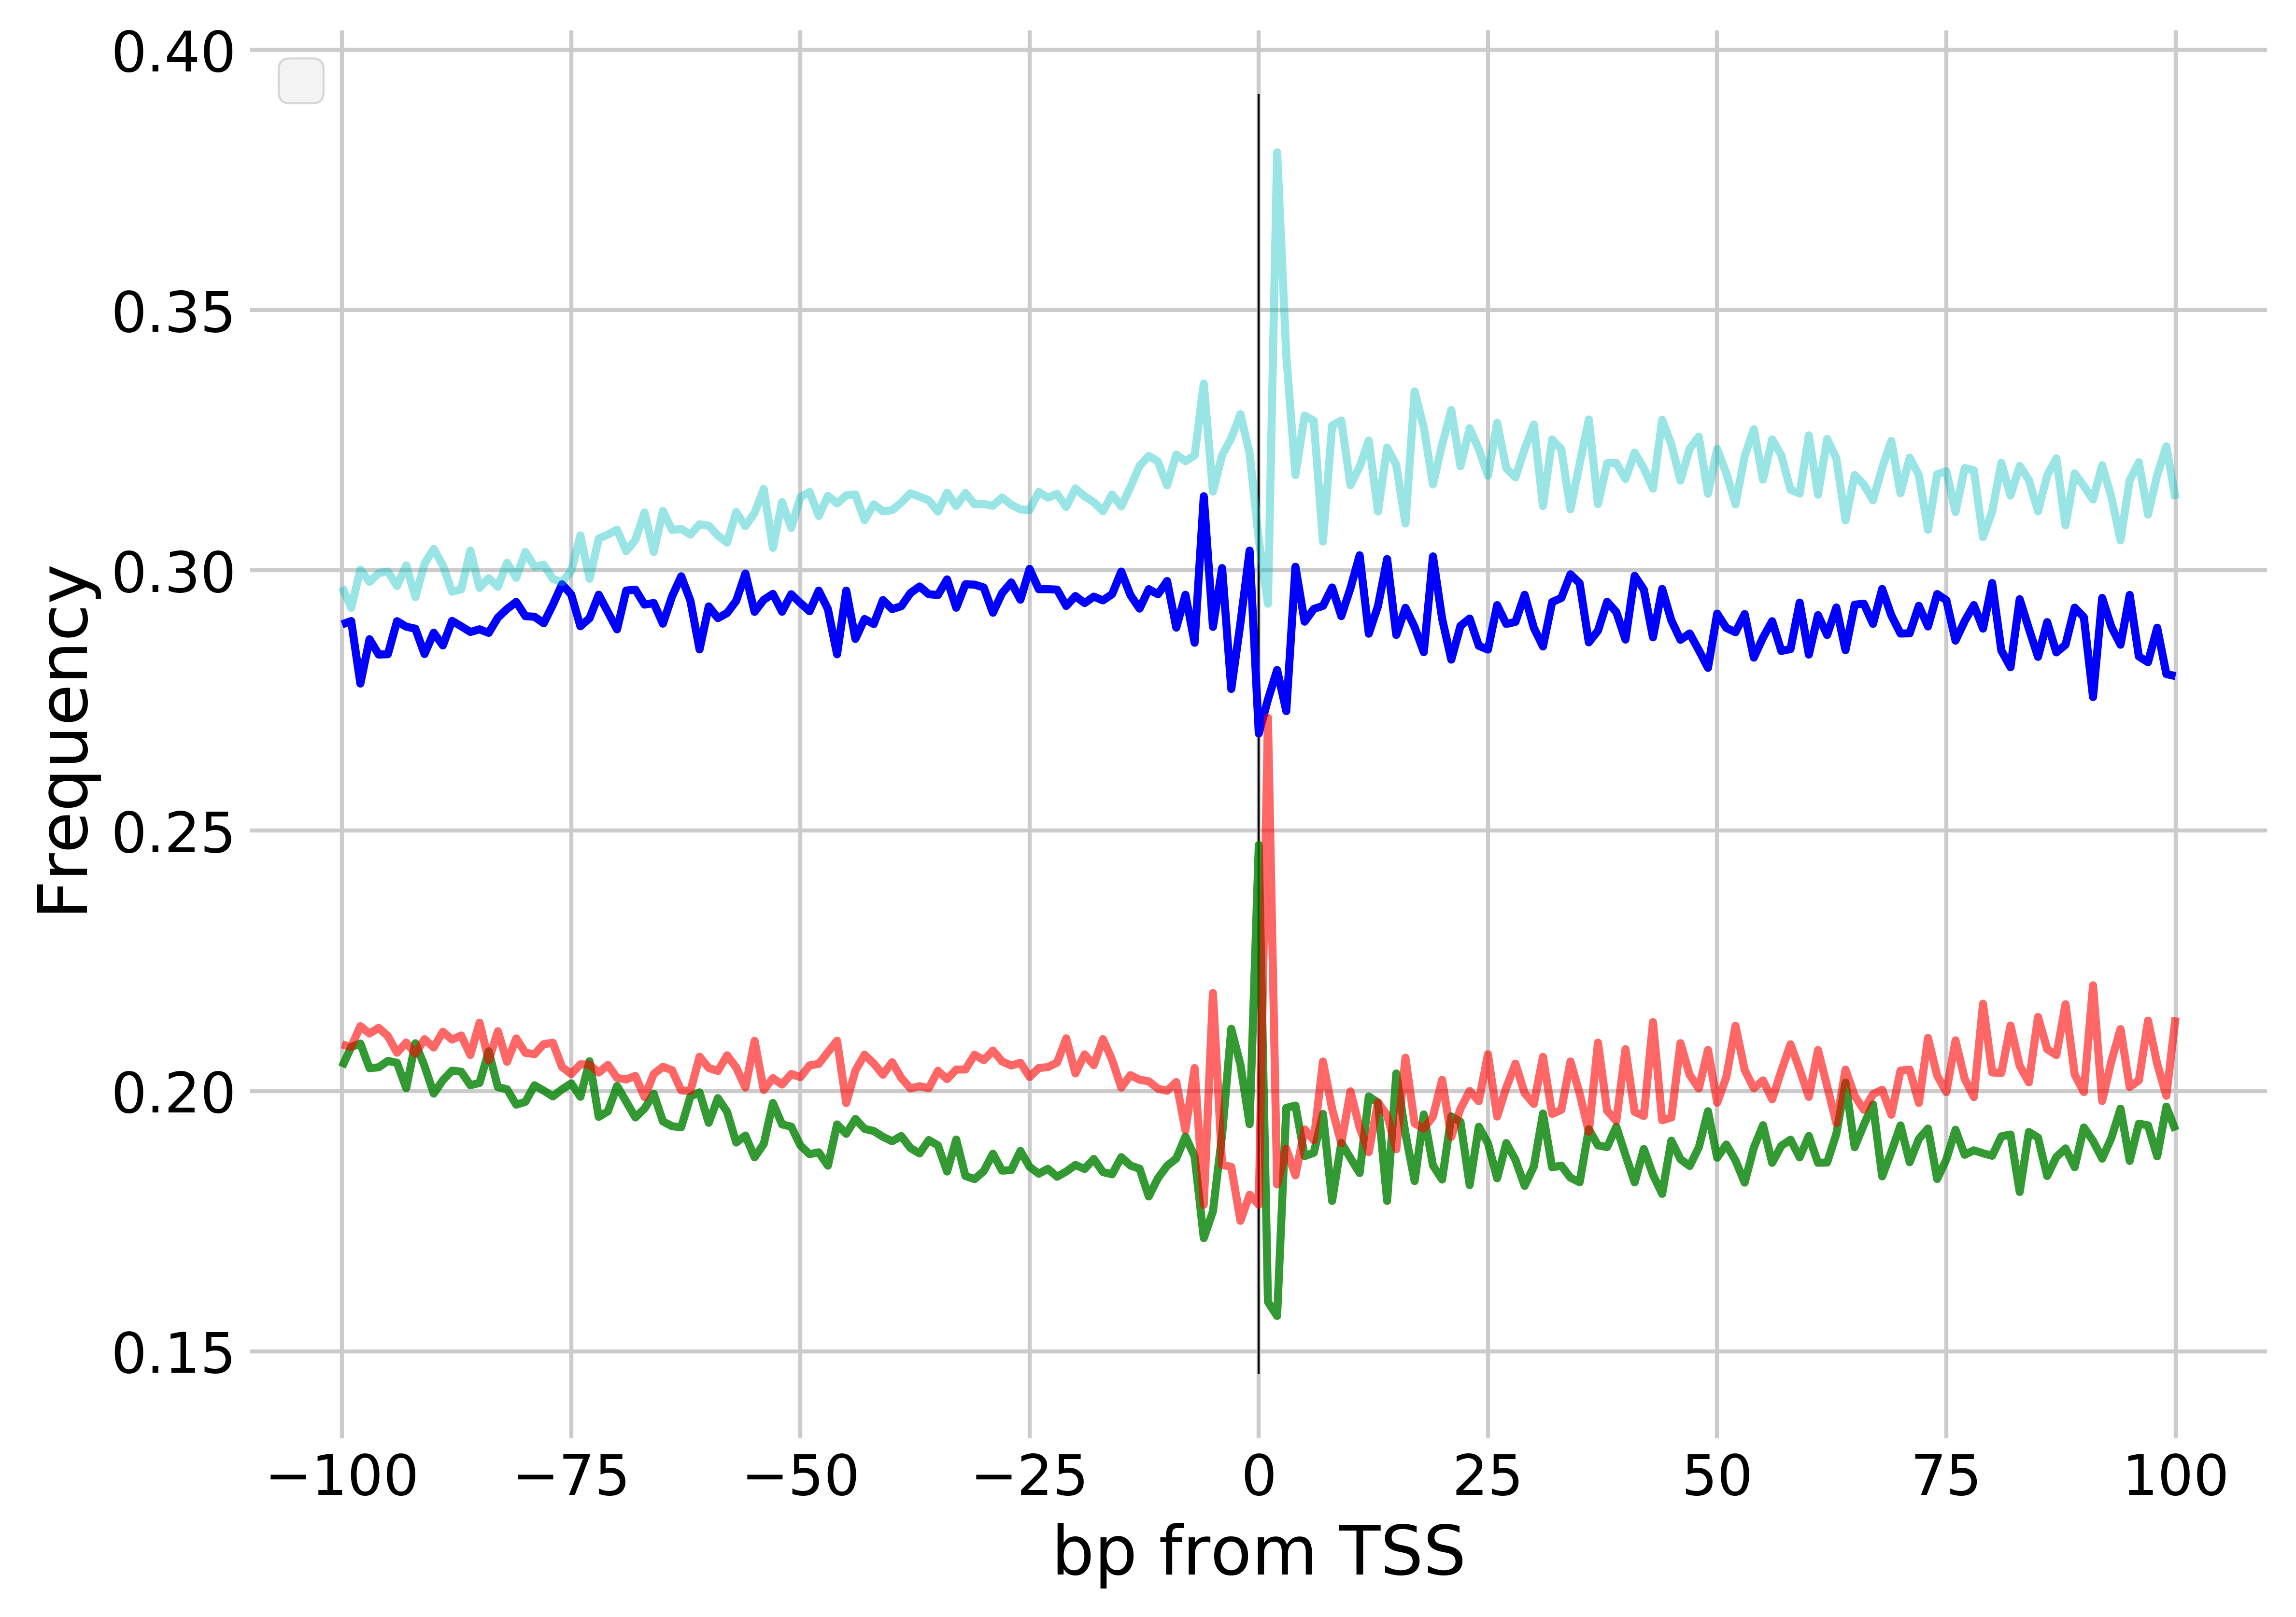

In [5]:
f2 = "genome/picr/gcf/mRNA.peak"
homer_nucleotide(mRNA_peak_file,
    join(nucleotide_out,'gcf_nucfreq_nucl'),
    ref_fa,
    size=200)

annotatePeaks.pl output_annotation/TSS1.exp.bed /data/isshamie/genome/hamster/ncbi_anno_103/GCF_003668045.1_CriGri-PICR/GCF_003668045.1_CriGri-PICR_genomic.fna -size 200 -hist 1 -di > gcf_nucleotide/eTSS_nucfreq_nucl


No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


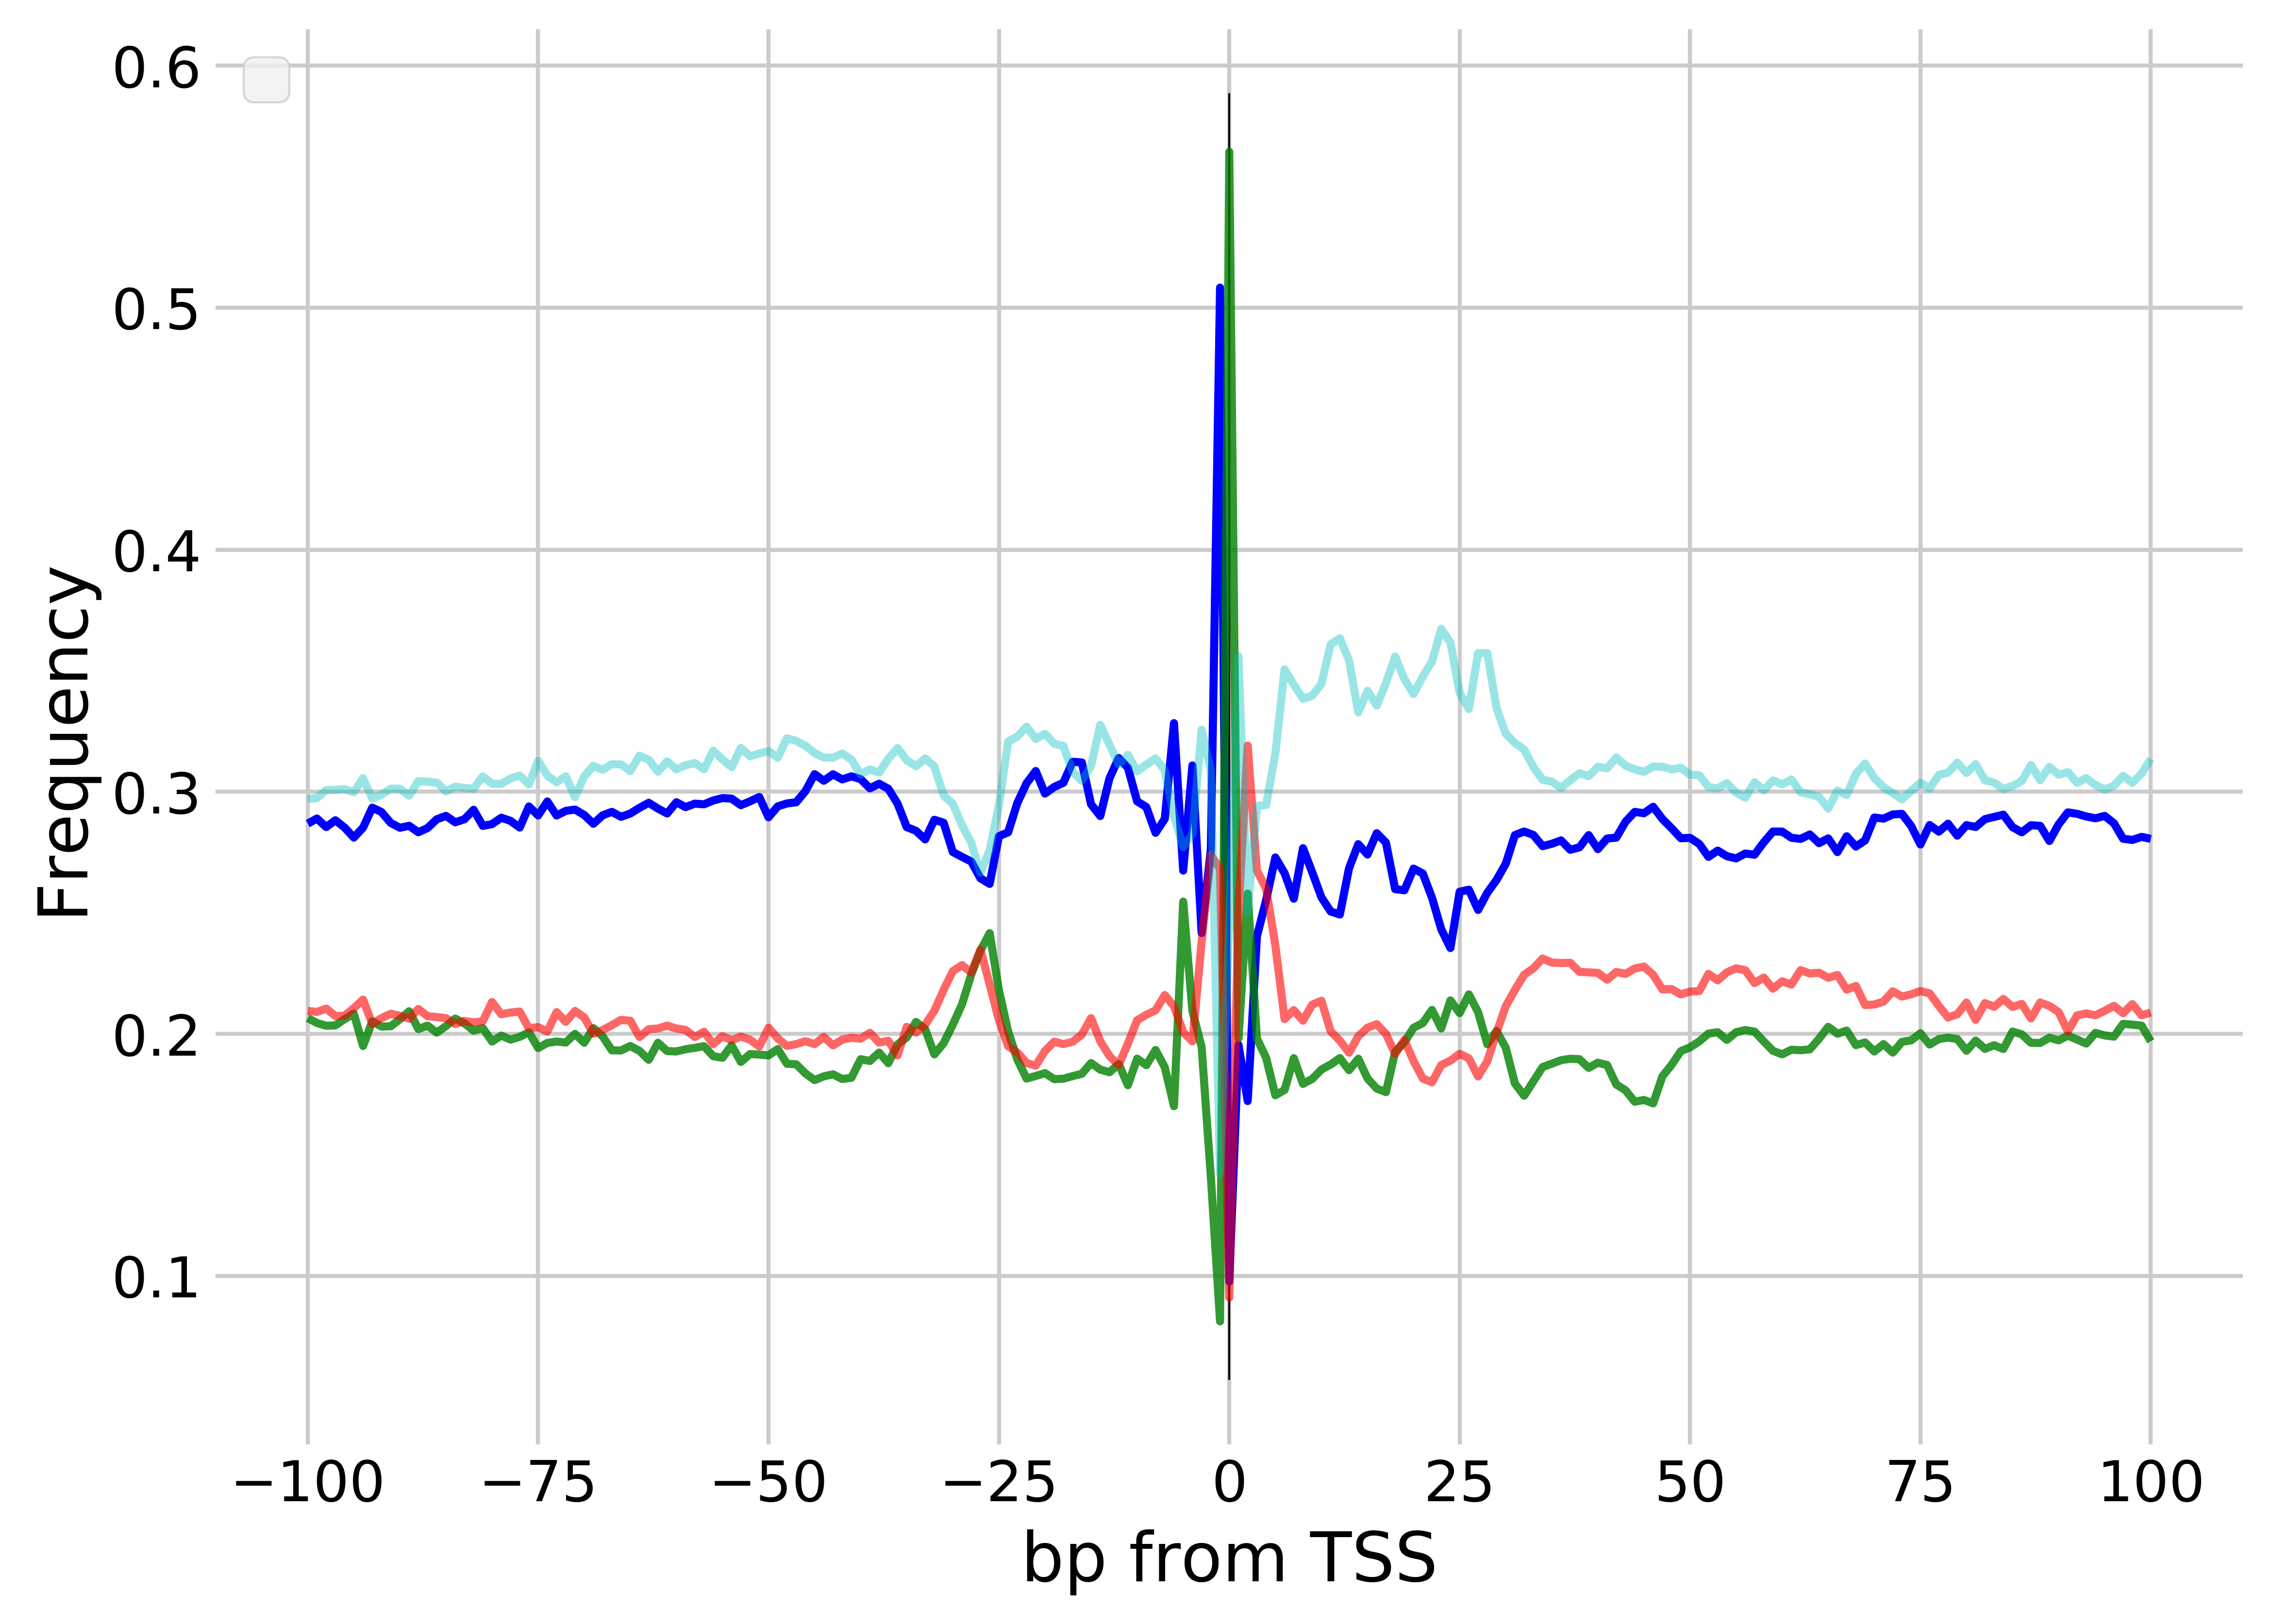

In [6]:
f1 = "output_annotation/TSS1.exp.bed"
homer_nucleotide(f1,
    join(nucleotide_out,'eTSS_nucfreq_nucl'),
    ref_fa,
    size=200)

# Motifs

In [7]:
# ref_fa = doc["ref_fa"]
# anno_gff = doc["annotation"]
# mRNA_peak_file = "genome/picr/gcf/mRNA.peak"
# tss_annotation = 'genome/picr/gcf/start_site_mRNA.tsv'


# seq_f = "genome/picr/gcf/mRNA_150.tss.fa"
# peak_f = "genome/picr/gcf/mRNA_150.tss.bed" #"genome/hg38/mRNA_150.tss.peak"s

## Motif Generation

### Using FIMO

In [8]:
t = time.time()
meme_motifs_dir = join(supplemental,'homer_motifs/MEME_motifs.txt')
out_dir = join(motif_out, "gcf.meme")
#meme_motifs_dir = join("fimo", 'hg38', 'MEME_motifs_short.txt')

cmd = "fimo --o {out_dir} {motif_f} {seq_f} ".format(motif_f=meme_motifs_dir,seq_f=seq_f,out_dir=out_dir)
print(cmd)
!{cmd}
print(t - time.time())


fimo --o gcf_motif_from_meme/gcf.meme /data/isshamie/TSS/Analysis/supplemental/homer_motifs/MEME_motifs.txt genome/picr/gcf/mRNA_150.tss.fa 
Using motif +ap1.motif of width 10.
Using motif -ap1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +ap2.motif of width 12.
Using motif -ap2.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.679208
Using motif +ap2gamma.motif of width 12.
Using motif -ap2gamma.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.6796
Using motif +ap4.motif of width 10.
Using motif -ap4.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.907541
Using motif +ar-half.motif of width 10.
Using motif -ar-half.motif of 

Estimated pi_0=0.898614
Using motif +couptf2.motif of width 8.
Using motif -couptf2.motif of width 8.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.868679
Using motif +cre.motif of width 12.
Using motif -cre.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.718269
Using motif +crx.motif of width 8.
Using motif -crx.motif of width 8.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +ctcf-mys.motif of width 20.
Using motif -ctcf-mys.motif of width 20.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.986809
Using motif +ctcf.motif of width 20.
Using motif -ctcf.motif of width 20.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estima

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.902222
Using motif +ets.motif of width 10.
Using motif -ets.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.870088
Using motif +ets1.motif of width 10.
Using motif -ets1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.952645
Using motif +etv1.motif of width 10.
Using motif -etv1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.87717
Using motif +etv2.motif of width 12.
Using motif -etv2.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.944029
Using motif +etv4.motif of width 10.
Using motif -etv4.motif of width 10.
Computin

Estimated pi_0=0.908837
Using motif +gli.motif of width 12.
Using motif -gli.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.777714
Using motif +gre-raw.motif of width 15.
Using motif -gre-raw.motif of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.998265
Using motif +gre.motif of width 16.
Using motif -gre.motif of width 16.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.975425
Using motif +grhl2.motif of width 20.
Using motif -grhl2.motif of width 20.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +gsc.motif of width 8.
Using motif -gsc.motif of width 8.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.806154
Using motif +klf14.motif of width 12.
Using motif -klf14.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.781311
Using motif +klf3.motif of width 15.
Using motif -klf3.motif of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.758512
Using motif +klf4.motif of width 10.
Using motif -klf4.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.775248
Using motif +klf5.motif of width 10.
Using motif -klf5.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.830175
Using motif +klf6.motif of width 12.
Using motif -klf6.motif of width 12.
Com

Estimated pi_0=1
Using motif +nfe2.motif of width 12.
Using motif -nfe2.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.999196
Using motif +nfe2l2.motif of width 15.
Using motif -nfe2l2.motif of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +nfil3.motif of width 15.
Using motif -nfil3.motif of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +nfkb.motif of width 10.
Using motif -nfkb.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.999397
Using motif +nfy.motif of width 10.
Using motif -nfy.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.87794

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +pax7.motif of width 10.
Using motif -pax7.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +pax8.motif of width 15.
Using motif -pax8.motif of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.718614
Using motif +pbx1.motif of width 12.
Using motif -pbx1.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.914118
Using motif +pbx2.motif of width 12.
Using motif -pbx2.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +pbx3.motif of width 12.
Using motif -pbx3.motif of width 12.
Computing q-values.
Estima

Estimated pi_0=0.938389
Using motif +rxr.motif of width 14.
Using motif -rxr.motif of width 14.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.908732
Using motif +scl.motif of width 8.
Using motif -scl.motif of width 8.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.960964
Using motif +scrt1.motif of width 10.
Using motif -scrt1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.911636
Using motif +sf1.motif of width 10.
Using motif -sf1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.917436
Using motif +six1.motif of width 12.
Using motif -six1.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated p

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.919531
Using motif +tcf12.motif of width 10.
Using motif -tcf12.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.797222
Using motif +tcf21.motif of width 10.
Using motif -tcf21.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.890827
Using motif +tcf3.motif of width 10.
Using motif -tcf3.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +tcf4.motif of width 12.
Using motif -tcf4.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +tcf7.motif of width 12.
Using motif -tcf7.motif of width 12.
Computing q-val

Estimated pi_0=0.887593
Using motif +znf263.motif of width 10.
Using motif -znf263.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.754775
Using motif +znf264.motif of width 12.
Using motif -znf264.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.922692
Using motif +znf317.motif of width 15.
Using motif -znf317.motif of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.985464
Using motif +znf322.motif of width 20.
Using motif -znf322.motif of width 20.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.860451
Using motif +znf382.motif of width 20.
Using motif -znf382.motif of width 20.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Es

In [11]:
motif_f = os.path.join(out_dir, "fimo.tsv")
peaks_df_exp = read_bed_file(peak_f.replace(".peak",".bed"))
peaks_df_exp = peaks_df_exp[~(peaks_df_exp.index.duplicated())]
motifs_df_exp = pd.read_csv(motif_f,sep="\t",comment="#")
#inr = motifs_df[motifs_df["motif_id"] == "inr.motif"]
motifs_df_exp.head()

,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence
0,ronin.motif,NaN,XM_027409439.1,5,24,+,30.4364,1.230000e-12,0.000003,GACTACAACTCCCAGAAGGC
1,ronin.motif,NaN,XM_027409440.1,6,25,+,30.4364,1.230000e-12,0.000003,GACTACAACTCCCAGAAGGC
2,ronin.motif,NaN,XM_027414975.1,20,39,+,30.4364,1.230000e-12,0.000003,GACTACAACTCCCAGAAGGC
3,ronin.motif,NaN,XM_027431202.1,53,72,-,30.4364,1.230000e-12,0.000003,GACTACAACTCCCAGAAGGC
4,znf16.motif,NaN,XM_027408480.1,99,123,+,33.8970,1.450000e-12,0.000014,AACCTTCCATGGCTCCCTATCACCT


In [12]:
motifs_of_interest = ["tata.motif", "inr.motif"]
#motifs_of_interest = ["ap2.motif"]

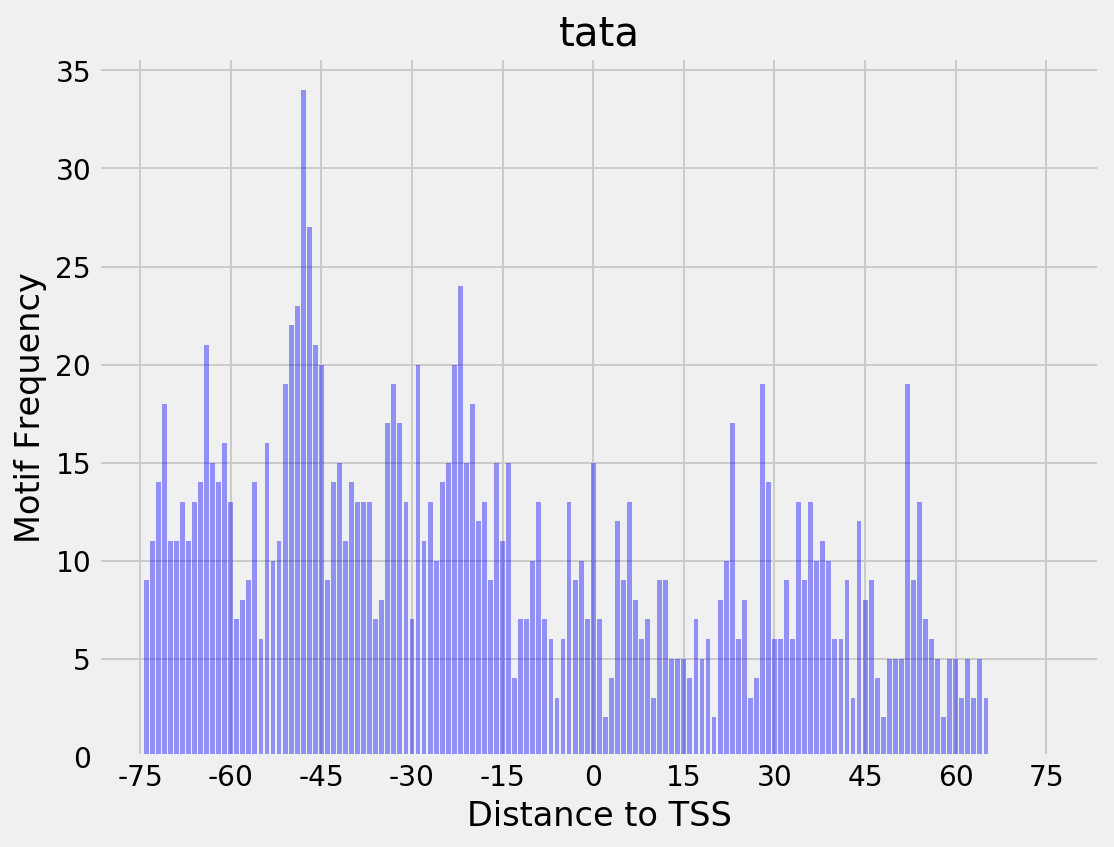

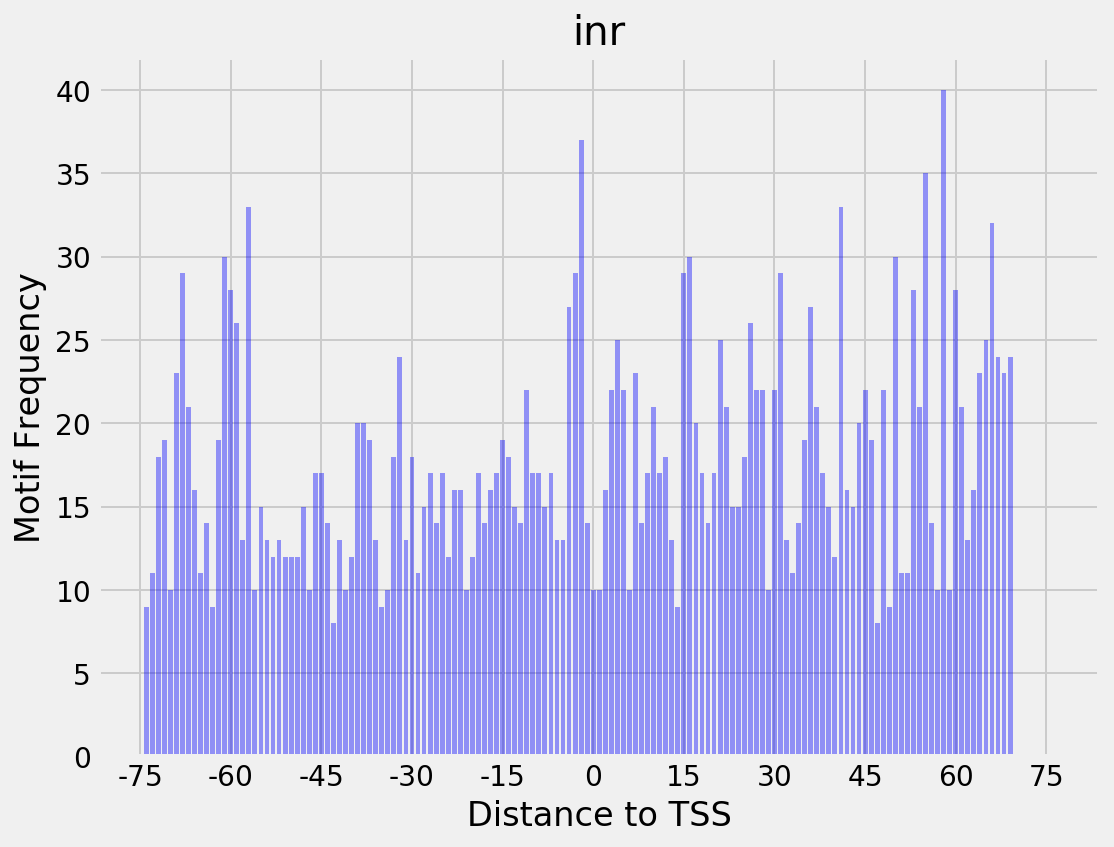

In [16]:
peak_center=75
motifs_data = dict()
for m in motifs_of_interest:
    name = m.replace(".motif", "")
    curr_exp = motifs_df_exp[motifs_df_exp["motif_id"] ==  m]
    
    #curr = motifs_df.query("motif_id == 'tata.motif' ")
    num_nts = np.max(curr_exp["stop"])
    
    curr_out_neg_exp = motif_analysis.initialize_motif_df(peaks_df_exp.index,seq_len=num_nts)

    curr_out_pos_exp = motif_analysis.initialize_motif_df(peaks_df_exp.index,seq_len=num_nts)

    
    #first_seq = curr_out.columns.values[0]
    first_seq = curr_out_neg_exp.columns.values[0]
    for ind,val in (curr_exp.iterrows()):
        if val["strand"] == "-":
            curr_out_neg_exp.at[val["sequence_name"],first_seq + val["start"] - 1] = True

    for ind,val in (curr_exp.iterrows()):
        if val["strand"] == "+":
            curr_out_pos_exp.at[val["sequence_name"],first_seq + val["start"] - 1] = True
        
    N = 5
    f,ax = plt.subplots()
    
    y_exp = np.array(curr_out_pos_exp.sum()) +np.array(curr_out_neg_exp.sum())
    motifs_data[name] = pd.DataFrame({"Position":curr_out_neg_exp.columns.values, "Motif Counts Human HG38":y_exp})
    motifs_data[name].to_csv(os.path.join(out_dir, name+".csv"), index=False)
        
    ax.bar(x=range(1, len(y_exp)+1), height= y_exp, color="b", alpha=0.4)
    plt.title(name)
    
    ax.set_xlabel("Distance to TSS")
    ax.set_ylabel("Motif Frequency")
    
    ax.set_xticks(np.arange(-1*peak_center,peak_center+1, 15) + peak_center)
    ax.set_xticklabels(np.arange(-1*peak_center,peak_center+1, 15))


------

------

------